In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2 
from statsmodels.tsa.seasonal import seasonal_decompose
from math import sqrt
import seaborn as sns
sns.set()
from IPython.display import display, Math, Latex

In [2]:
df = pd.read_csv('/content/^GSPTSE.csv')

In [3]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,17376.800781,17466.099609,17360.000000,17442.500000,17442.500000,203774000
1,2020-01-28,17475.000000,17519.000000,17456.099609,17500.900391,17500.900391,198139800
2,2020-01-29,17547.500000,17561.900391,17496.699219,17511.800781,17511.800781,169412800
3,2020-01-30,17429.599609,17502.900391,17395.900391,17490.599609,17490.599609,191070300
4,2020-01-31,17442.300781,17450.699219,17272.699219,17318.500000,17318.500000,239157000


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
722,2022-12-09,19990.099609,20086.300781,19944.800781,19947.099609,19947.099609,215724900
723,2022-12-12,19841.099609,20019.900391,19834.300781,20019.699219,20019.699219,305801700
724,2022-12-13,20312.900391,20341.300781,19955.599609,20023.500000,20023.500000,278272300
725,2022-12-14,20022.599609,20081.800781,19864.000000,19891.699219,19891.699219,263781200
726,2022-12-15,19722.900391,19726.599609,19512.900391,19600.599609,19600.599609,277405200


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,727.000000,727.000000,727.000000,727.000000,727.000000,7.270000e+02
mean,18696.663004,18788.340292,18585.118024,18690.325741,18690.325741,2.591799e+08
std,2248.708296,2233.159247,2272.867903,2251.934051,2251.934051,9.121058e+07
min,11657.299805,11870.599609,11172.700195,11228.500000,11228.500000,4.052060e+07
25%,16813.400391,16906.200195,16751.349610,16889.800781,16889.800781,2.084352e+08
50%,19203.300781,19294.199219,19099.199219,19204.400391,19204.400391,2.439355e+08
75%,20423.549804,20505.000000,20379.050781,20464.000000,20464.000000,2.833193e+08
max,22109.699219,22213.099609,22045.199219,22087.199219,22087.199219,9.440374e+08


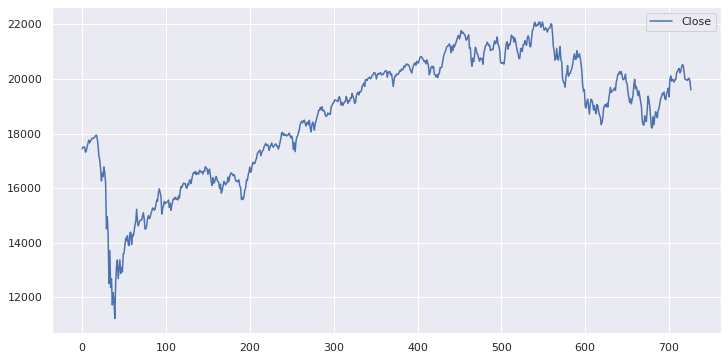

In [6]:
df[['Close']].plot(figsize=(12,6));


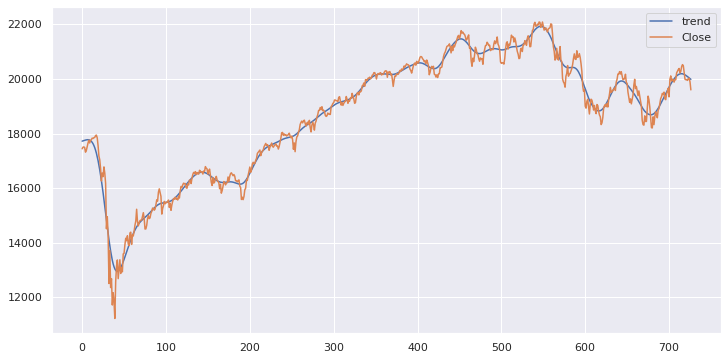

In [7]:
from statsmodels.tsa.filters.hp_filter import hpfilter
gdp_cycle, gdp_trend = hpfilter(df['Close'], lamb=1600)
df['trend'] = gdp_trend
df[['trend','Close']].plot(figsize=(12,6))
#tendencia

In [8]:
sts.adfuller(df.Close)
#no se rechaza la hipotesis nula
#la serie no es estacionaria

(-1.5984485895232163,
 0.48437275422237264,
 9,
 717,
 {'1%': -3.439503230053971,
  '5%': -2.8655794463678346,
  '10%': -2.5689210707289982},
 9593.719573877928)

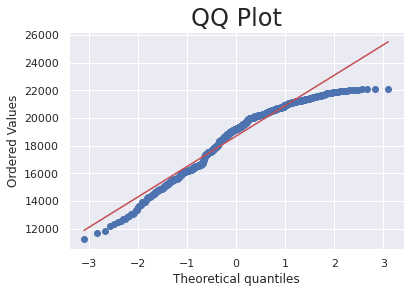

In [9]:
import scipy.stats

scipy.stats.probplot(df.Close, plot =  plt)
plt.title("QQ Plot", size = 24)
plt.show()

In [10]:
df['returns'] = df.Close.pct_change(1)*100

In [11]:
df['sq_returns'] = df.returns.mul(df.returns)


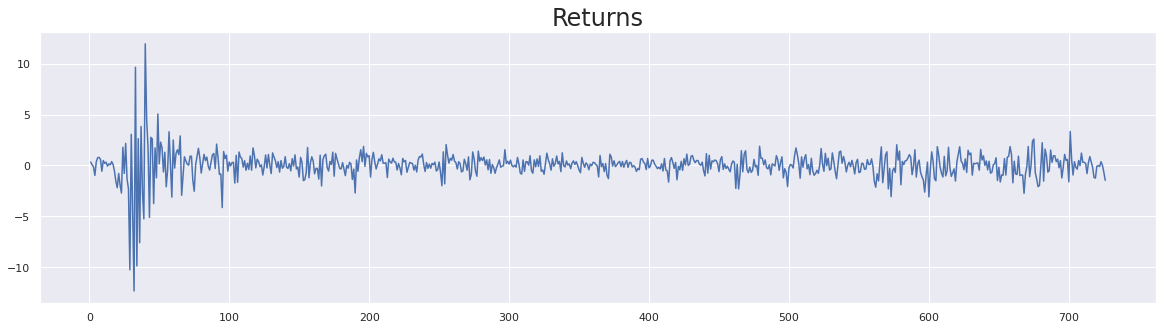

In [12]:
df.returns.plot(figsize=(20,5))
plt.title("Returns", size = 24)
plt.show()


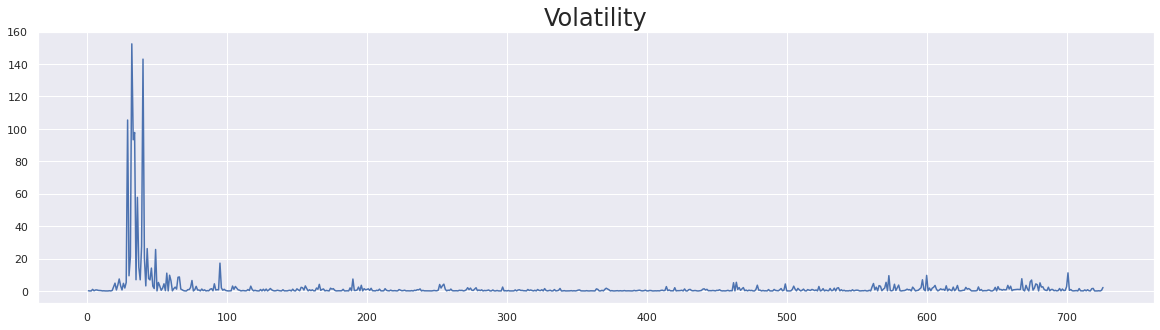

In [13]:
df.sq_returns.plot(figsize=(20,5))
plt.title("Volatility", size = 24)
plt.show()

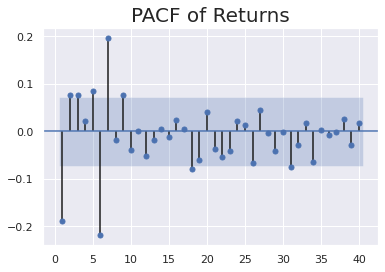

In [14]:
sgt.plot_pacf(df.returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Returns", size = 20)
plt.show()

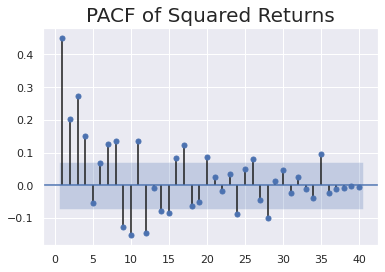

In [15]:
sgt.plot_pacf(df.sq_returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Squared Returns", size = 20)
plt.show()

In [16]:
!pip install arch


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 907.3/907.3 KB 19.3 MB/s eta 0:00:00


In [17]:
from arch import arch_model


In [18]:
display(Math(r'\sigma_{t}^2 = \omega_0 + \sum_{i=1}^p \alpha_1\in_{t-1}^2'))
#Modelo ARCH

<IPython.core.display.Math object>

In [19]:
model_arch_1 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 1)
results_arch_1 = model_arch_1.fit(update_freq = 1)
results_arch_1.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 3824692796915.827
Iteration:      2,   Func. Count:     12,   Neg. LLF: 54820.1171051161
Iteration:      3,   Func. Count:     17,   Neg. LLF: 1043.2216090874454
Iteration:      4,   Func. Count:     22,   Neg. LLF: 1710.9227349131586
Iteration:      5,   Func. Count:     28,   Neg. LLF: 1034.0969823522207
Iteration:      6,   Func. Count:     32,   Neg. LLF: 1034.0966221162294
Iteration:      7,   Func. Count:     35,   Neg. LLF: 1034.0966221162175
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1034.0966221162294
            Iterations: 7
            Function evaluations: 35
            Gradient evaluations: 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1034.10
Distribution:                  Normal   AIC:                           2074.19
Method:            Maximum Likelihood   BIC:                           2087.96
                                        No. Observations:                  726
Date:                Sat, Jan 28 2023   Df Residuals:                      725
Time:                        00:54:24   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1055  3.503e-02      3.011  2.604e-03 [3.681e-02,  0.174]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.5462  6.337e-02      8.619  6.746e-18 [  0.422,  0.670]
alpha[1]       0.7416      0.149      4.985  6.186e-07 [  0.450,  1.033]
========================================================================

Covariance estimator: robust
"""

In [20]:
model_arch_2 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 2)
results_arch_2 = model_arch_2.fit(update_freq = 5)
results_arch_2.summary()

Iteration:      5,   Func. Count:     36,   Neg. LLF: 985.3965648116847
Optimization terminated successfully    (Exit mode 0)
            Current function value: 982.5594854834969
            Iterations: 8
            Function evaluations: 51
            Gradient evaluations: 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -982.559
Distribution:                  Normal   AIC:                           1973.12
Method:            Maximum Likelihood   BIC:                           1991.47
                                        No. Observations:                  726
Date:                Sat, Jan 28 2023   Df Residuals:                      725
Time:                        00:54:24   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0927  2.676e-02      3.464  5.316e-04 [4.025e-02,  0.145]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.2973  3.997e-02      7.437  1.030e-13 [  0.219,  0.376]
alpha[1]       0.5331      0.125      4.255  2.094e-05 [  0.288,  0.779]
alpha[2]       0.4001  8.141e-02      4.915  8.883e-07 [  0.241,  0.560]
========================================================================

Covariance estimator: robust
"""

In [21]:
model_arch_3 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 3)
results_arch_3 = model_arch_3.fit(update_freq = 5)
results_arch_3.summary()

Iteration:      5,   Func. Count:     38,   Neg. LLF: 1118.3098544342404
Iteration:     10,   Func. Count:     72,   Neg. LLF: 974.0408477762036
Optimization terminated successfully    (Exit mode 0)
            Current function value: 974.040844485161
            Iterations: 12
            Function evaluations: 83
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -974.041
Distribution:                  Normal   AIC:                           1958.08
Method:            Maximum Likelihood   BIC:                           1981.02
                                        No. Observations:                  726
Date:                Sat, Jan 28 2023   Df Residuals:                      725
Time:                        00:54:25   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0812  2.863e-02      2.835  4.584e-03 [2.505e-02,  0.137]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.2911  4.247e-02      6.853  7.236e-12   [  0.208,  0.374]
alpha[1]       0.4079      0.129      3.158  1.589e-03   [  0.155,  0.661]
alpha[2]       0.2716  6.678e-02      4.067  4.756e-05   [  0.141,  0.402]
alpha[3]       0.1638  6.366e-02      2.574  1.006e-02 [3.907e-02,  0.289]
==========================================================================

Covariance estimator: robust
"""

In [22]:
model_arch_13 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 13)
results_arch_13 = model_arch_13.fit(update_freq = 5)
results_arch_13.summary()

Iteration:      5,   Func. Count:     89,   Neg. LLF: 3101.72369097911
Iteration:     10,   Func. Count:    174,   Neg. LLF: 968.3917266619328
Iteration:     15,   Func. Count:    259,   Neg. LLF: 970.1033261974583
Iteration:     20,   Func. Count:    344,   Neg. LLF: 970.5187960998958
Iteration:     25,   Func. Count:    425,   Neg. LLF: 964.7379588290919
Optimization terminated successfully    (Exit mode 0)
            Current function value: 964.7379588290919
            Iterations: 26
            Function evaluations: 440
            Gradient evaluations: 26


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -964.738
Distribution:                  Normal   AIC:                           1959.48
Method:            Maximum Likelihood   BIC:                           2028.29
                                        No. Observations:                  726
Date:                Sat, Jan 28 2023   Df Residuals:                      725
Time:                        00:54:25   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0825  6.623e-02      1.245      0.213 [-4.735e-02,  0.212]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.2405      0.173      1.392      0.164 [-9.820e-02,  0.579]
alpha[1]       0.3213      0.503      0.639      0.523    [ -0.664,  1.307]
alpha[2]       0.2314      0.119      1.937  5.277e-02 [-2.763e-03,  0.466]
alpha[3]       0.1278      0.119      1.070      0.284    [ -0.106,  0.362]
alpha[4]       0.0239      0.358  6.676e-02      0.947    [ -0.679,  0.726]
alpha[5]       0.0000      0.206      0.000      1.000    [ -0.404,  0.404]
alpha[6]       0.0834      0.299      0.279      0.780    [ -0.503,  0.670]
alpha[7]       0.0000      0.420      0.000      1.000    [ -0.823,  0.823]
alpha[8]   7.5433e-03      0.128  5.897e-02      0.953    [ -0.243,  0.258]
alpha[9]       0.0369  4.995e-02      0.738      0.460 [-6.102e-02,  0.135]
alpha[10]  6.3421e-04      0.414  1.533e-03      0.999    [ -0.810,  0.812]
alpha[11]      0.0000      0.134      0.000      1.000    [ -0.263,  0.263]
alpha[12]      0.0000      0.171      0.000      1.000    [ -0.336,  0.336]
alpha[13]      0.0000      0.861      0.000      1.000    [ -1.687,  1.687]
===========================================================================

Covariance estimator: robust
"""

In [23]:
display(Math(r'\sigma_t^2 = \Omega + \sum_{i=1}^p\alpha_1\in_{t-1}^2 + \sum_{j=1}^p\beta_1\sigma_{t-1}^2'))
#Modelo GARCH

<IPython.core.display.Math object>

In [24]:
model_garch_1_1 = arch_model(df.returns[1:], mean = "Constant", vol = "GARCH", p = 1, q = 1)
results_garch_1_1 = model_garch_1_1.fit(update_freq = 5)
results_garch_1_1.summary()

Iteration:      5,   Func. Count:     34,   Neg. LLF: 972.291101382739
Iteration:     10,   Func. Count:     60,   Neg. LLF: 971.3749835687393
Optimization terminated successfully    (Exit mode 0)
            Current function value: 971.3749835687393
            Iterations: 11
            Function evaluations: 64
            Gradient evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -971.375
Distribution:                  Normal   AIC:                           1950.75
Method:            Maximum Likelihood   BIC:                           1969.10
                                        No. Observations:                  726
Date:                Sat, Jan 28 2023   Df Residuals:                      725
Time:                        00:54:25   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0783  2.711e-02      2.887  3.892e-03 [2.512e-02,  0.131]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.0915  3.259e-02      2.808  4.983e-03 [2.764e-02,  0.155]
alpha[1]       0.3487      0.102      3.414  6.409e-04   [  0.148,  0.549]
beta[1]        0.6030  8.635e-02      6.983  2.891e-12   [  0.434,  0.772]
==========================================================================

Covariance estimator: robust
"""

In [25]:
model_garch_1_2 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 2)
results_garch_1_2 = model_garch_1_2.fit(update_freq = 5)
results_garch_1_2.summary()

Iteration:      5,   Func. Count:     39,   Neg. LLF: 972.1184141567221
Iteration:     10,   Func. Count:     70,   Neg. LLF: 971.3731278060654
Optimization terminated successfully    (Exit mode 0)
            Current function value: 971.3730877377527
            Iterations: 13
            Function evaluations: 87
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -971.373
Distribution:                  Normal   AIC:                           1952.75
Method:            Maximum Likelihood   BIC:                           1975.68
                                        No. Observations:                  726
Date:                Sat, Jan 28 2023   Df Residuals:                      725
Time:                        00:54:25   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0784  2.753e-02      2.848  4.400e-03 [2.445e-02,  0.132]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.0918  3.161e-02      2.905  3.674e-03 [2.987e-02,  0.154]
alpha[1]       0.3505      0.112      3.142  1.676e-03   [  0.132,  0.569]
beta[1]        0.5931      0.194      3.054  2.262e-03   [  0.212,  0.974]
beta[2]    7.8754e-03      0.144  5.488e-02      0.956   [ -0.273,  0.289]
==========================================================================

Covariance estimator: robust
"""

In [26]:
model_garch_1_3 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 3)
results_garch_1_3 = model_garch_1_3.fit(update_freq = 5)
results_garch_1_3.summary()

Iteration:      5,   Func. Count:     44,   Neg. LLF: 973.8552684906679
Iteration:     10,   Func. Count:     81,   Neg. LLF: 971.2918245292334
Optimization terminated successfully    (Exit mode 0)
            Current function value: 971.2909911832368
            Iterations: 13
            Function evaluations: 101
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -971.291
Distribution:                  Normal   AIC:                           1954.58
Method:            Maximum Likelihood   BIC:                           1982.11
                                        No. Observations:                  726
Date:                Sat, Jan 28 2023   Df Residuals:                      725
Time:                        00:54:25   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0794  2.756e-02      2.882  3.954e-03 [2.541e-02,  0.133]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.0929  3.048e-02      3.050  2.289e-03 [3.322e-02,  0.153]
alpha[1]       0.3599      0.111      3.246  1.171e-03   [  0.143,  0.577]
beta[1]        0.5702      0.400      1.427      0.154   [ -0.213,  1.353]
beta[2]    7.3167e-16      0.511  1.432e-15      1.000   [ -1.002,  1.002]
beta[3]        0.0216      0.166      0.130      0.896   [ -0.304,  0.347]
==========================================================================

Covariance estimator: robust
"""

In [27]:
model_garch_2_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 2, q = 1)
results_garch_2_1 = model_garch_2_1.fit(update_freq = 5)
results_garch_2_1.summary()

Iteration:      5,   Func. Count:     40,   Neg. LLF: 971.9908111632376
Iteration:     10,   Func. Count:     72,   Neg. LLF: 971.375733358679
Optimization terminated successfully    (Exit mode 0)
            Current function value: 971.3749832863189
            Iterations: 13
            Function evaluations: 89
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -971.375
Distribution:                  Normal   AIC:                           1952.75
Method:            Maximum Likelihood   BIC:                           1975.69
                                        No. Observations:                  726
Date:                Sat, Jan 28 2023   Df Residuals:                      725
Time:                        00:54:26   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0783  2.798e-02      2.797  5.164e-03 [2.341e-02,  0.133]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.0915  4.566e-02      2.004  4.508e-02 [2.005e-03,  0.181]
alpha[1]       0.3486      0.123      2.829  4.670e-03   [  0.107,  0.590]
alpha[2]       0.0000      0.132      0.000      1.000   [ -0.259,  0.259]
beta[1]        0.6030      0.130      4.649  3.344e-06   [  0.349,  0.857]
==========================================================================

Covariance estimator: robust
"""

In [28]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 3, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     46,   Neg. LLF: 971.744727244411
Iteration:     10,   Func. Count:     83,   Neg. LLF: 971.374990251718
Optimization terminated successfully    (Exit mode 0)
            Current function value: 971.3749836095533
            Iterations: 12
            Function evaluations: 96
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -971.375
Distribution:                  Normal   AIC:                           1954.75
Method:            Maximum Likelihood   BIC:                           1982.28
                                        No. Observations:                  726
Date:                Sat, Jan 28 2023   Df Residuals:                      725
Time:                        00:54:26   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0783  2.924e-02      2.676  7.440e-03 [2.095e-02,  0.136]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0915  6.723e-02      1.361      0.173 [-4.026e-02,  0.223]
alpha[1]       0.3486      0.129      2.707  6.785e-03  [9.623e-02,  0.601]
alpha[2]       0.0000      0.144      0.000      1.000    [ -0.282,  0.282]
alpha[3]   4.3651e-14      0.111  3.946e-13      1.000    [ -0.217,  0.217]
beta[1]        0.6030      0.215      2.804  5.041e-03    [  0.182,  1.024]
===========================================================================

Covariance estimator: robust
"""

In [29]:
display(Math(r'ln\sigma_{t}^2 = \omega_0 + \sum_{i=1}^p\alpha_i(|\in_{t-i}|+\gamma_i\in_{t_i}) + \sum_{j=1}^q\beta_j\ln\sigma_{t-j}^2'))
#Modelo EGARCH

<IPython.core.display.Math object>

In [30]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "EGARCH", p = 1, o = 1, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     46,   Neg. LLF: 8782.190798189398
Iteration:     10,   Func. Count:     80,   Neg. LLF: 953.3928325052897
Iteration:     15,   Func. Count:    109,   Neg. LLF: 953.3877390650395
Optimization terminated successfully    (Exit mode 0)
            Current function value: 953.3877390658248
            Iterations: 15
            Function evaluations: 109
            Gradient evaluations: 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - EGARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -953.388
Distribution:                  Normal   AIC:                           1916.78
Method:            Maximum Likelihood   BIC:                           1939.71
                                        No. Observations:                  726
Date:                Sat, Jan 28 2023   Df Residuals:                      725
Time:                        00:54:26   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         4.5380e-03  4.191e-02      0.108      0.914 [-7.760e-02,8.668e-02]
                               Volatility Model                               
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
omega      -1.8542e-03  1.344e-02     -0.138      0.890 [-2.820e-02,2.449e-02]
alpha[1]        0.1875      0.552      0.340      0.734      [ -0.894,  1.269]
gamma[1]       -0.2120  8.042e-02     -2.637  8.374e-03   [ -0.370,-5.442e-02]
beta[1]         0.9661  8.725e-02     11.072  1.720e-28      [  0.795,  1.137]
==============================================================================

Covariance estimator: robust
"""

In [31]:
display(Math(r'\sigma_t^2 = \omega + \sum_{i=1}^p\alpha\in_{t-1}^2 + \gamma\in_{t-1}^2I_{|\in_{t-1}<0|} + \sum_{j=1}^p\beta\sigma_{t-1}^2 '))
#modelo GJR-GARCH

<IPython.core.display.Math object>

In [32]:
am = arch_model(df.returns[1:], p=1, o=1, q=1)
res = am.fit(update_freq=5, disp="off")
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Constant Mean - GJR-GARCH Model Results                    
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -956.053
Distribution:                  Normal   AIC:                           1922.11
Method:            Maximum Likelihood   BIC:                           1945.04
                                        No. Observations:                  726
Date:                Sat, Jan 28 2023   Df Residuals:                      725
Time:                        00:54:26   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0293  2.818e-02      1.040      0.299 [-2.594e-02,8.454e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0668  2.562e-02      2.605  9.176e-03  [1.654e-02,  0.117]
alpha[1]       0.0614  5.837e-02      1.052      0.293 [-5.301e-02,  0.176]
gamma[1]       0.4156      0.123      3.379  7.270e-04    [  0.175,  0.657]
beta[1]        0.6933  8.339e-02      8.315  9.208e-17    [  0.530,  0.857]
===========================================================================

Covariance estimator: robust
"""

In [33]:
display(Math(r'\sigma_t = \omega + \sum_{p=1}^1\alpha\in_{t-1} + \sum_{o=1}^o\gamma\in_{t-1}I_{|\in_{t-1}<0|} + \sum_{q=1}^q\beta\sigma_{t-1}'))
#modelo TARCH

<IPython.core.display.Math object>

In [34]:
am = arch_model(df.returns[1:], p=1, o=1, q=1, power=1.0)
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     37,   Neg. LLF: 1255.4755884661622
Iteration:     10,   Func. Count:     74,   Neg. LLF: 948.5865779212488
Iteration:     15,   Func. Count:    106,   Neg. LLF: 948.2555789411866
Optimization terminated successfully    (Exit mode 0)
            Current function value: 948.2555789411866
            Iterations: 16
            Function evaluations: 111
            Gradient evaluations: 16


<class 'statsmodels.iolib.summary.Summary'>
"""
                  Constant Mean - TARCH/ZARCH Model Results                   
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                TARCH/ZARCH   Log-Likelihood:               -948.256
Distribution:                  Normal   AIC:                           1906.51
Method:            Maximum Likelihood   BIC:                           1929.45
                                        No. Observations:                  726
Date:                Sat, Jan 28 2023   Df Residuals:                      725
Time:                        00:54:26   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         5.0532e-03  3.355e-02      0.151      0.880 [-6.071e-02,7.082e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0394  4.669e-02      0.845      0.398 [-5.207e-02,  0.131]
alpha[1]       0.0000      0.123      0.000      1.000    [ -0.241,  0.241]
gamma[1]       0.2482  6.888e-02      3.603  3.140e-04    [  0.113,  0.383]
beta[1]        0.8672      0.163      5.321  1.032e-07    [  0.548,  1.187]
===========================================================================

Covariance estimator: robust
"""

In [35]:
display(Math(r'h_t = \omega + [1 - \beta\ L - \phi\ L(1-L)^\delta]\in_t^2 + \beta\ h_{t-1}'))
#modelo FIGARCH

<IPython.core.display.Math object>

In [36]:
from arch.univariate import FIGARCH

In [37]:
am = arch_model(df.returns[1:], p=1, q=1, power=2.0, vol = "FIGARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     41,   Neg. LLF: 971.7967547038106
Iteration:     10,   Func. Count:     71,   Neg. LLF: 970.4608281918634
Optimization terminated successfully    (Exit mode 0)
            Current function value: 970.4608281918569
            Iterations: 10
            Function evaluations: 71
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                    Constant Mean - FIGARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                    FIGARCH   Log-Likelihood:               -970.461
Distribution:                  Normal   AIC:                           1950.92
Method:            Maximum Likelihood   BIC:                           1973.86
                                        No. Observations:                  726
Date:                Sat, Jan 28 2023   Df Residuals:                      725
Time:                        00:54:26   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0760  2.873e-02      2.646  8.139e-03 [1.972e-02,  0.132]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0980  5.603e-02      1.750  8.019e-02 [-1.179e-02,  0.208]
phi        5.1348e-16      0.222  2.310e-15      1.000    [ -0.436,  0.436]
d              0.8165  8.773e-02      9.307  1.317e-20    [  0.645,  0.988]
beta           0.3898      0.240      1.622      0.105 [-8.123e-02,  0.861]
===========================================================================

Covariance estimator: robust
"""

In [38]:
display(Math(r'\sigma_t^2 = \omega + \in_{i=1}^m \alpha_l(l_i^{-1} \sum_{j+1}^l \in_{t-j}^2)'))
#modelo HARCH

<IPython.core.display.Math object>

In [39]:
from arch.univariate import HARCH

In [40]:
am = arch_model(df.returns[1:], p=1, q=1, power=2.0, vol = "HARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     34,   Neg. LLF: 1034.9505861821033
Iteration:     10,   Func. Count:     54,   Neg. LLF: 1034.0966221863168
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1034.0966221863168
            Iterations: 11
            Function evaluations: 57
            Gradient evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - HARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      HARCH   Log-Likelihood:               -1034.10
Distribution:                  Normal   AIC:                           2074.19
Method:            Maximum Likelihood   BIC:                           2087.96
                                        No. Observations:                  726
Date:                Sat, Jan 28 2023   Df Residuals:                      725
Time:                        00:54:27   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1054  3.503e-02      3.011  2.607e-03 [3.680e-02,  0.174]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.5462  6.337e-02      8.619  6.749e-18 [  0.422,  0.670]
alpha[1]       0.7416      0.149      4.985  6.187e-07 [  0.450,  1.033]
========================================================================

Covariance estimator: robust
"""

In [41]:
display(Math(r'\sigma_t^\delta = \omega + \sum_{i=1}^p\alpha_i(|\in_{t-1}|-\gamma_i\ I_{[0>i]}\in_{t-i})^\delta + \sum_{k=1}^q \beta_k \sigma_{t-k}^\delta'))
#modelo APARCH

<IPython.core.display.Math object>

In [42]:
from arch.univariate import APARCH


In [43]:
am = arch_model(df.returns[1:], p=1, o=1, q=1, power=2.0, vol = "APARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     49,   Neg. LLF: 985.3633419502014
Iteration:     10,   Func. Count:     90,   Neg. LLF: 952.5762842722718
Iteration:     15,   Func. Count:    126,   Neg. LLF: 952.4931480983053
Optimization terminated successfully    (Exit mode 0)
            Current function value: 952.493145358693
            Iterations: 17
            Function evaluations: 139
            Gradient evaluations: 17


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - APARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     APARCH   Log-Likelihood:               -952.493
Distribution:                  Normal   AIC:                           1916.99
Method:            Maximum Likelihood   BIC:                           1944.51
                                        No. Observations:                  726
Date:                Sat, Jan 28 2023   Df Residuals:                      725
Time:                        00:54:27   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0108  3.209e-02      0.336      0.737 [-5.211e-02,7.368e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0508  4.514e-02      1.125      0.261 [-3.769e-02,  0.139]
alpha[1]       0.1563      0.123      1.271      0.204 [-8.478e-02,  0.397]
gamma[1]       0.8231      0.512      1.606      0.108    [ -0.181,  1.827]
beta[1]        0.8283      0.142      5.822  5.820e-09    [  0.549,  1.107]
delta          1.0287      0.265      3.877  1.056e-04    [  0.509,  1.549]
===========================================================================

Covariance estimator: robust
"""

In [44]:
from scipy import stats


In [45]:
jarque_bera_test = stats.jarque_bera(df.Close)
jarque_bera_test

Jarque_beraResult(statistic=60.8769153503515, pvalue=6.039613253960852e-14)

In [46]:
jarque_bera_test.statistic

60.8769153503515

In [47]:
jarque_bera_test.pvalue

6.039613253960852e-14

jarquer-bera para los retornos

In [48]:
returns = df.returns[1:]
returns

1      0.334817
2      0.062285
3     -0.121068
4     -0.983955
5      0.353961
         ...   
722   -0.110668
723    0.363961
724    0.018985
725   -0.658230
726   -1.463423
Name: returns, Length: 726, dtype: float64

In [49]:
jarque_bera_test = stats.jarque_bera(returns)
jarque_bera_test

Jarque_beraResult(statistic=19826.732579405536, pvalue=0.0)

In [50]:
jarque_bera_test.statistic

19826.732579405536

In [51]:
jarque_bera_test.pvalue

0.0

curtosis

In [52]:
returns.kurt()

25.706033039935036

coef. asimetria

In [53]:
returns.skew()

-1.014957903706068

In [54]:
from arch.unitroot import PhillipsPerron

pp = PhillipsPerron(df.returns[1:])
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                -31.938
P-value                         0.000
Lags                               20
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [55]:
from arch.unitroot import DFGLS

dfgls = DFGLS(df.returns[1:])
print(dfgls.summary().as_text())

      Dickey-Fuller GLS Results      
Test Statistic                 -6.386
P-value                         0.000
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: -2.60 (1%), -1.97 (5%), -1.65 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [56]:
from arch.unitroot import ADF

adf = ADF(df.returns[1:])
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -7.584
P-value                         0.000
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [57]:
from arch.unitroot import KPSS

kpss = KPSS(df.returns[1:])
print(kpss.summary().as_text())

    KPSS Stationarity Test Results   
Test Statistic                  0.075
P-value                         0.720
Lags                                5
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [58]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [59]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727 entries, 0 to 726
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        727 non-null    object 
 1   Open        727 non-null    float64
 2   High        727 non-null    float64
 3   Low         727 non-null    float64
 4   Close       727 non-null    float64
 5   Adj Close   727 non-null    float64
 6   Volume      727 non-null    int64  
 7   trend       727 non-null    float64
 8   returns     726 non-null    float64
 9   sq_returns  726 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 56.9+ KB


In [61]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [62]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

predictions

BUILD AND TRAIN A RIDGE LINEAR REGRESSION MODEL

In [63]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import keras

In [64]:
def trading_window(data):
  
  # 1 day window 
  n = 1

  # Create a column containing the prices for the next 1 days
  data['Target'] = data[['Close']].shift(-n)
  
  # return the new dataset 
  return data

In [65]:
data = pd.read_csv("/content/^GSPTSE.csv")

In [66]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,17376.800781,17466.099609,17360.000000,17442.500000,17442.500000,203774000
1,2020-01-28,17475.000000,17519.000000,17456.099609,17500.900391,17500.900391,198139800
2,2020-01-29,17547.500000,17561.900391,17496.699219,17511.800781,17511.800781,169412800
3,2020-01-30,17429.599609,17502.900391,17395.900391,17490.599609,17490.599609,191070300
4,2020-01-31,17442.300781,17450.699219,17272.699219,17318.500000,17318.500000,239157000
...,...,...,...,...,...,...,...
722,2022-12-09,19990.099609,20086.300781,19944.800781,19947.099609,19947.099609,215724900
723,2022-12-12,19841.099609,20019.900391,19834.300781,20019.699219,20019.699219,305801700
724,2022-12-13,20312.900391,20341.300781,19955.599609,20023.500000,20023.500000,278272300
725,2022-12-14,20022.599609,20081.800781,19864.000000,19891.699219,19891.699219,263781200


In [67]:
data = data[["Date","Close","Volume"]]


In [68]:
data

,Date,Close,Volume
0,2020-01-27,17442.500000,203774000
1,2020-01-28,17500.900391,198139800
2,2020-01-29,17511.800781,169412800
3,2020-01-30,17490.599609,191070300
4,2020-01-31,17318.500000,239157000
...,...,...,...
722,2022-12-09,19947.099609,215724900
723,2022-12-12,20019.699219,305801700
724,2022-12-13,20023.500000,278272300
725,2022-12-14,19891.699219,263781200


In [69]:
price_volume_target_df = trading_window(data)
price_volume_target_df

,Date,Close,Volume,Target
0,2020-01-27,17442.500000,203774000,17500.900391
1,2020-01-28,17500.900391,198139800,17511.800781
2,2020-01-29,17511.800781,169412800,17490.599609
3,2020-01-30,17490.599609,191070300,17318.500000
4,2020-01-31,17318.500000,239157000,17379.800781
...,...,...,...,...
722,2022-12-09,19947.099609,215724900,20019.699219
723,2022-12-12,20019.699219,305801700,20023.500000
724,2022-12-13,20023.500000,278272300,19891.699219
725,2022-12-14,19891.699219,263781200,19600.599609


In [70]:
# Remove the last row as it will be a null value
price_volume_target_df = price_volume_target_df[:-1]
price_volume_target_df

,Date,Close,Volume,Target
0,2020-01-27,17442.500000,203774000,17500.900391
1,2020-01-28,17500.900391,198139800,17511.800781
2,2020-01-29,17511.800781,169412800,17490.599609
3,2020-01-30,17490.599609,191070300,17318.500000
4,2020-01-31,17318.500000,239157000,17379.800781
...,...,...,...,...
721,2022-12-08,19969.199219,240247300,19947.099609
722,2022-12-09,19947.099609,215724900,20019.699219
723,2022-12-12,20019.699219,305801700,20023.500000
724,2022-12-13,20023.500000,278272300,19891.699219


In [71]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns = ['Date']))

In [72]:
price_volume_target_scaled_df

array([[0.57226007, 0.18068662, 0.57763828],
       [0.57763828, 0.17445077, 0.57864212],
       [0.57864212, 0.14265612, 0.57668966],
       ...,
       [0.80959966, 0.29360948, 0.80994968],
       [0.80994968, 0.26314032, 0.79781188],
       [0.79781188, 0.24710177, 0.77100391]])

In [73]:
price_volume_target_scaled_df.shape

(726, 3)

In [74]:
# Creating Feature and Target
X = price_volume_target_scaled_df[:,:2]
y = price_volume_target_scaled_df[:,2:]

In [75]:
# Converting dataframe to arrays
# X = np.asarray(X)
# y = np.asarray(y)
X.shape, y.shape

((726, 2), (726, 1))

In [76]:
# Spliting the data this way, since order is important in time-series
# Note that we did not use train test split with it's default settings since it shuffles the data
split = int(0.65 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [77]:
X_train.shape, y_train.shape

((471, 2), (471, 1))

In [78]:
X_test.shape, y_test.shape

((255, 2), (255, 1))

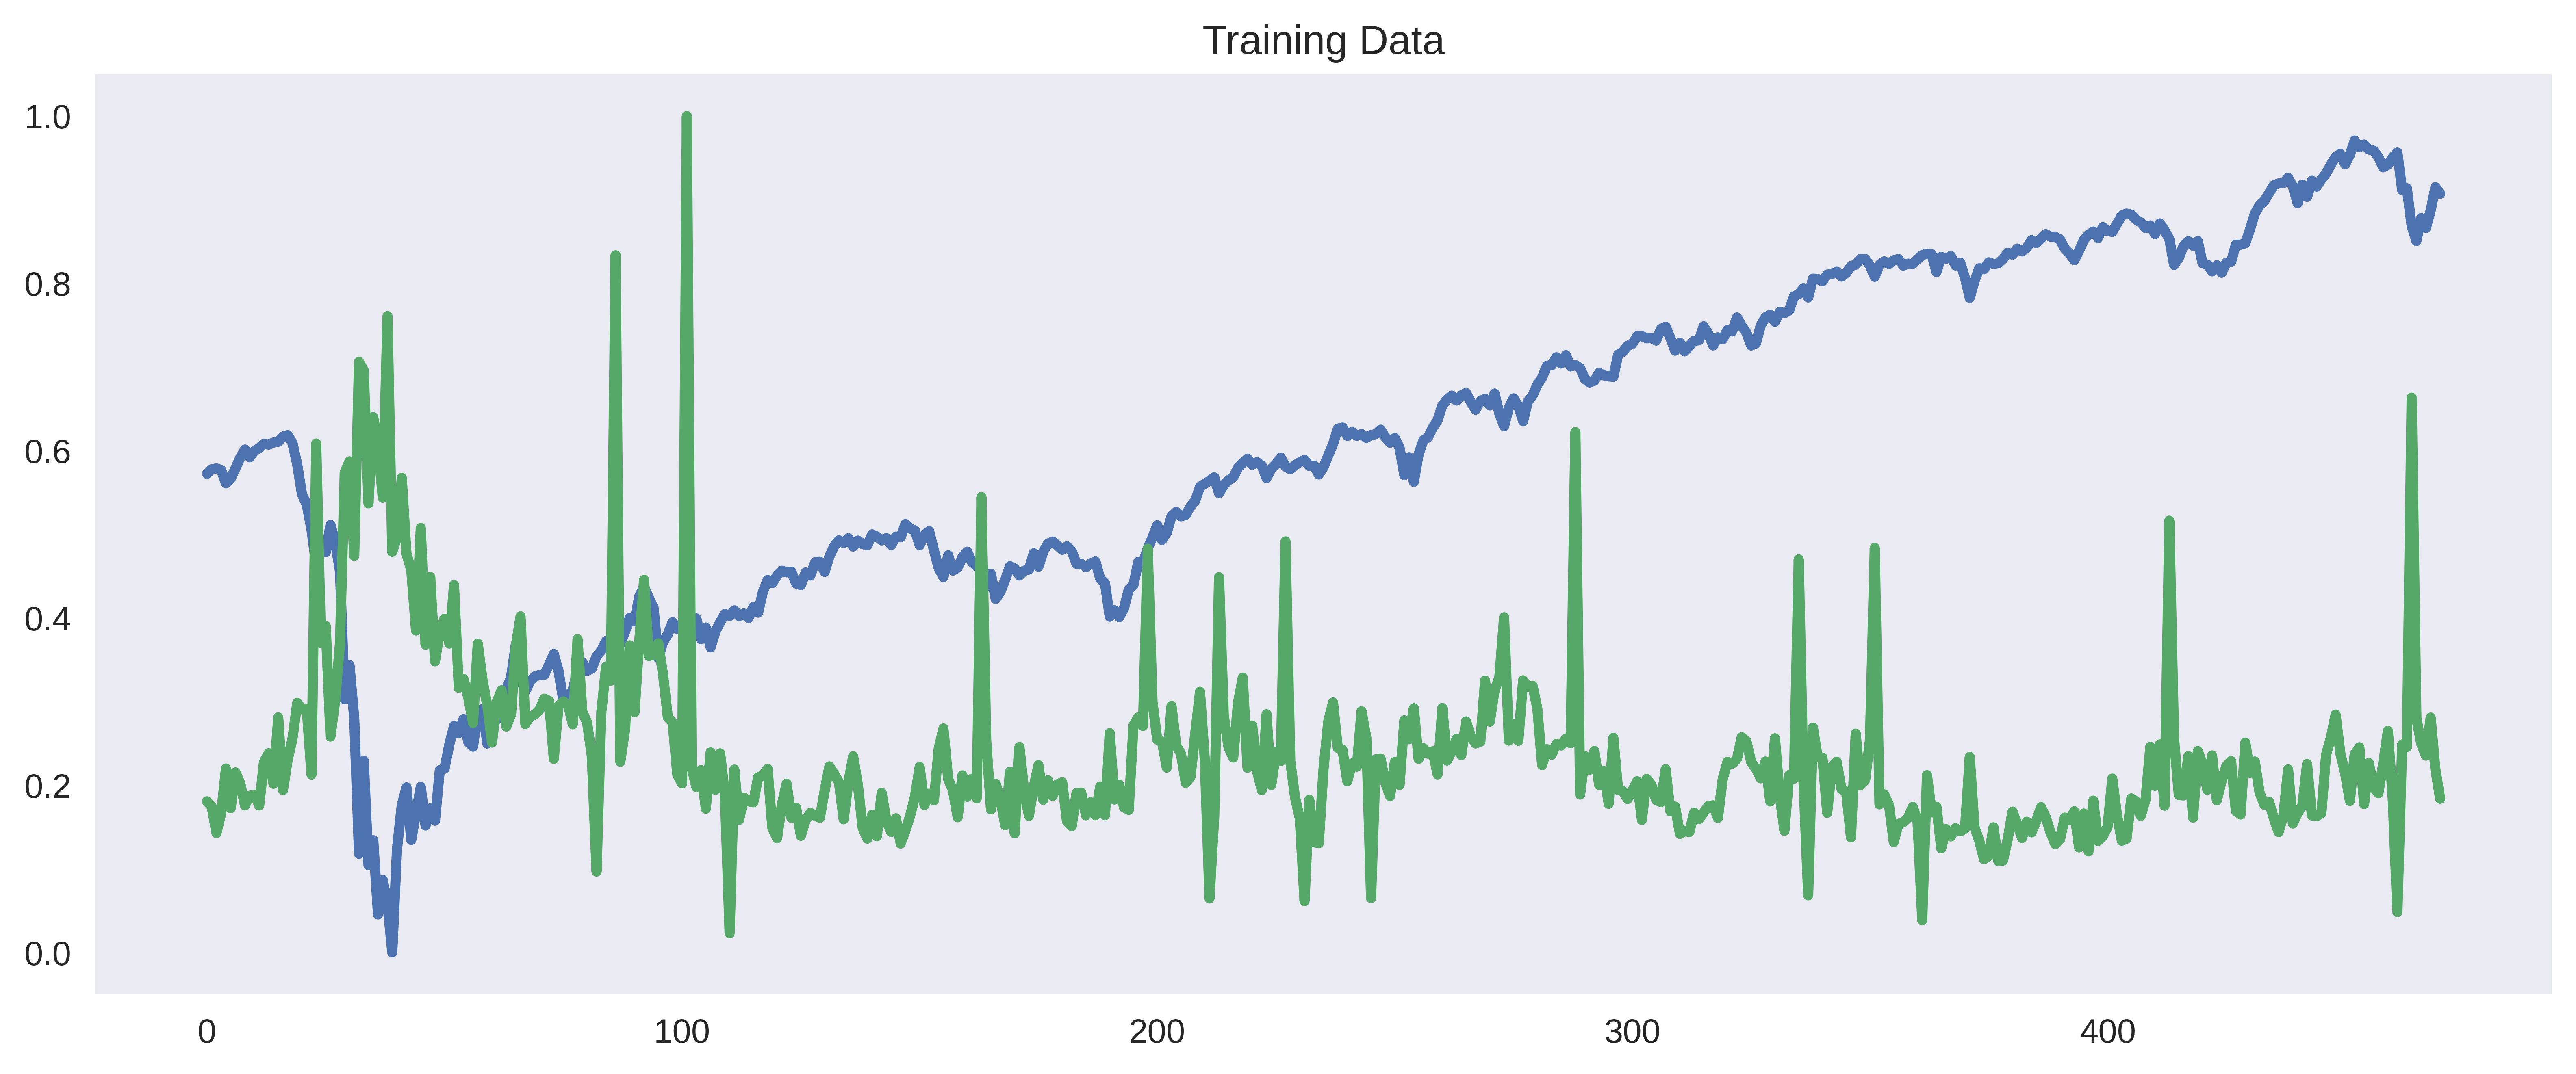

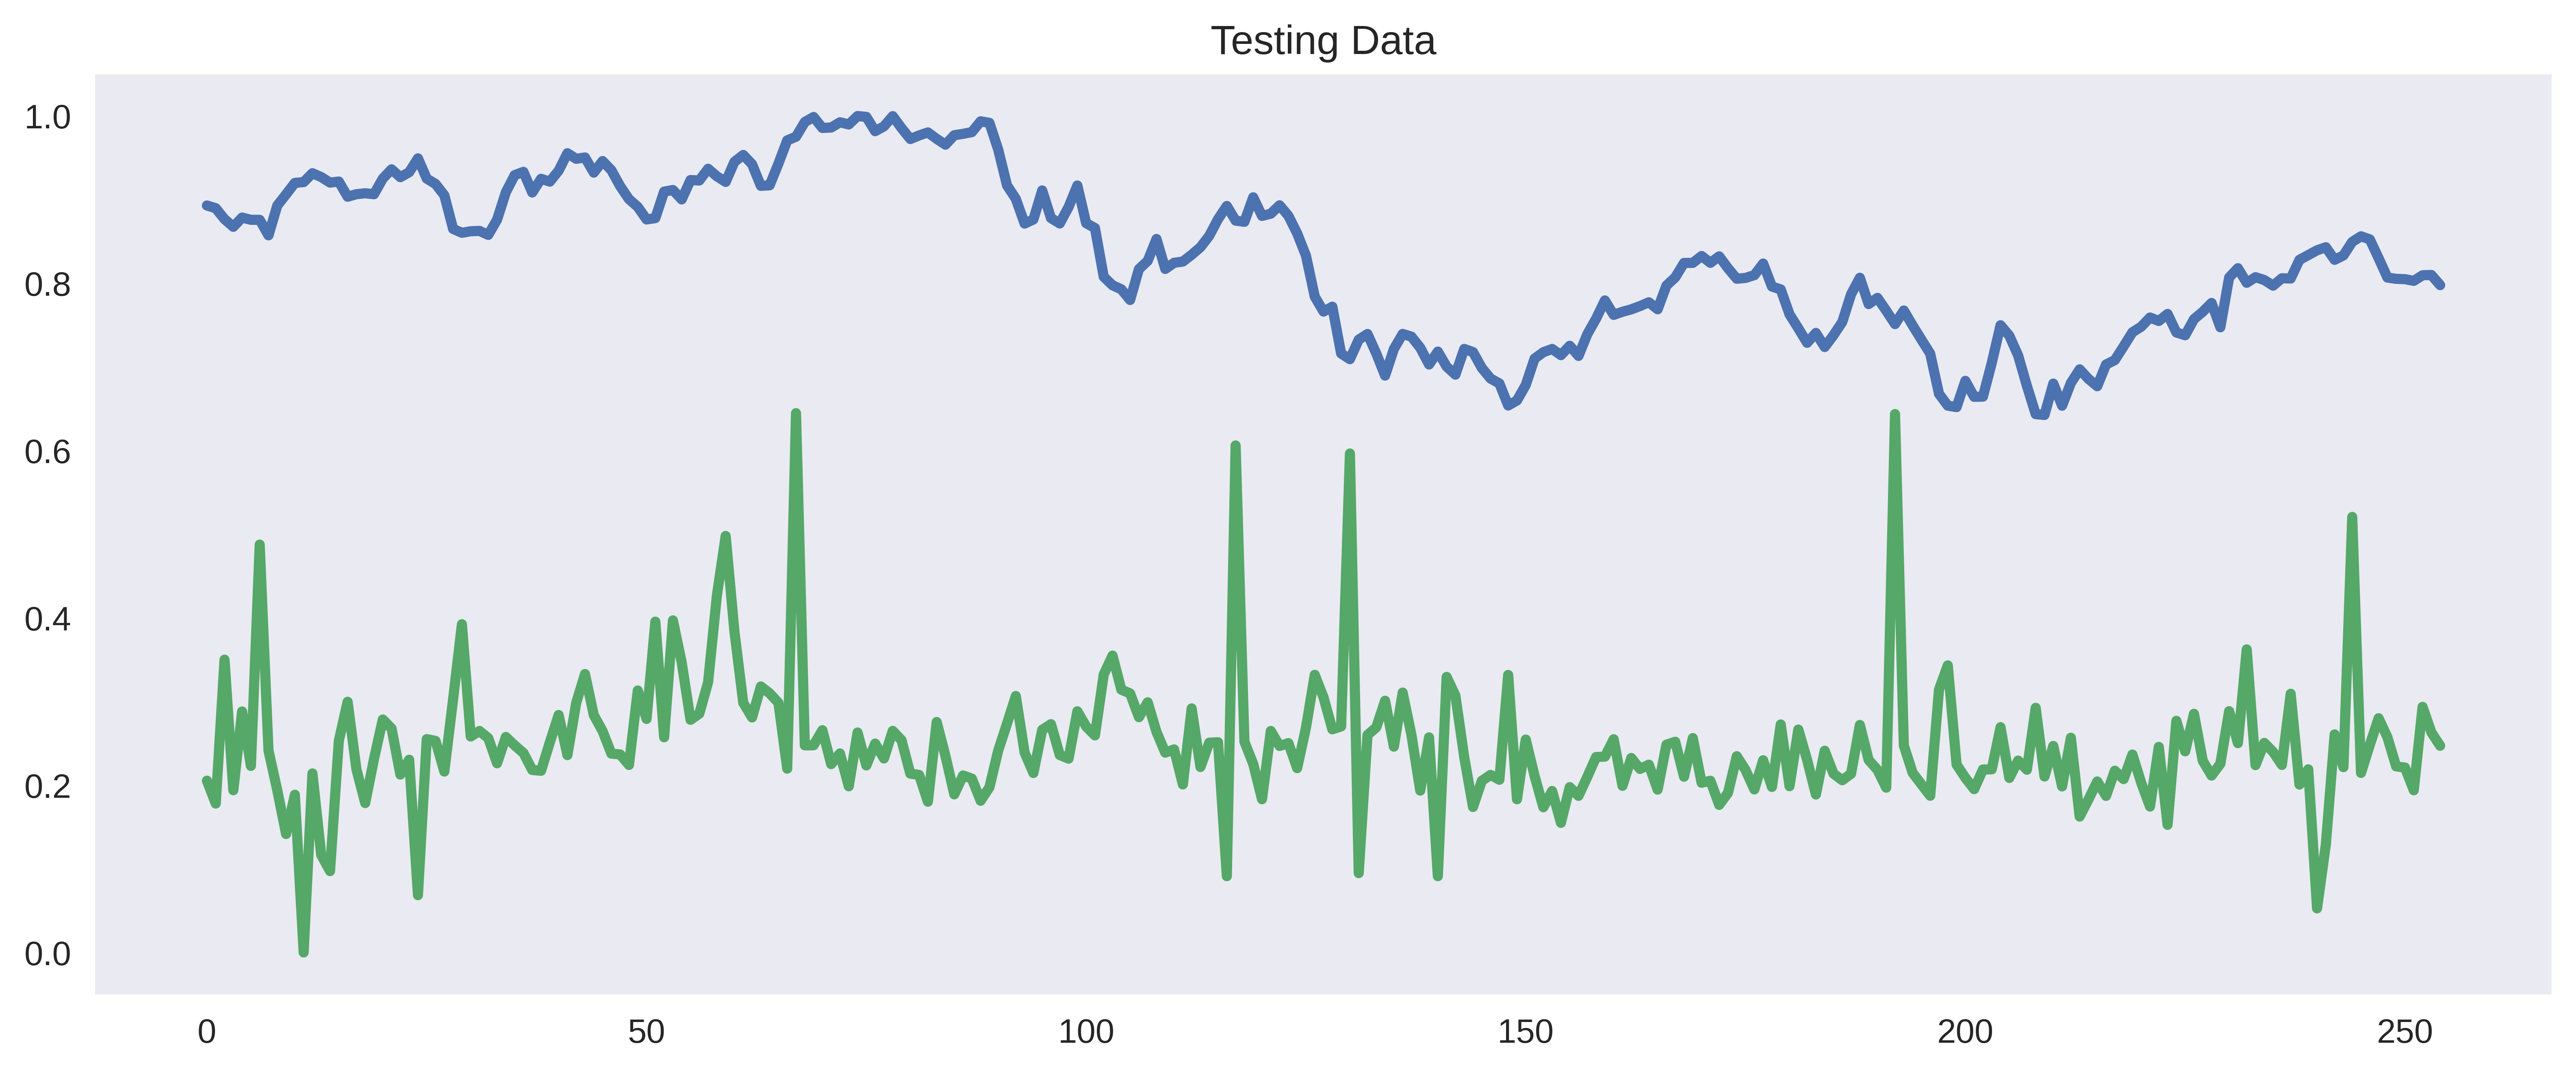

In [79]:
# Define a data plotting function
def show_plot(data, title):
  plt.figure(figsize = (13, 5))
  plt.plot(data, linewidth = 3)
  plt.title(title)
  plt.grid()

show_plot(X_train, 'Training Data')
show_plot(X_test, 'Testing Data')

In [80]:
from sklearn.linear_model import Ridge
# Note that Ridge regression performs linear least squares with L2 regularization.
# Create and train the Ridge Linear Regression  Model
regression_model = Ridge()

regression_model.fit(X_train, y_train)

Ridge()

In [81]:
# Test the model and calculate its accuracy 
lr_accuracy = regression_model.score(X_test, y_test)
print("Linear Regression Score: ", lr_accuracy)

Linear Regression Score:  0.936290732040033


In [82]:
# Make Prediction
predicted_prices = regression_model.predict(X)
predicted_prices

array([[0.57853099],
       [0.58392847],
       [0.58667904],
       [0.58348432],
       [0.56559555],
       [0.57358596],
       [0.58262275],
       [0.59534967],
       [0.60600988],
       [0.59654128],
       [0.60383207],
       [0.60770382],
       [0.60956788],
       [0.60795961],
       [0.61238618],
       [0.60872789],
       [0.61946017],
       [0.61900602],
       [0.60890487],
       [0.58221141],
       [0.54937561],
       [0.53765146],
       [0.51410089],
       [0.45235481],
       [0.49098551],
       [0.47862707],
       [0.51687846],
       [0.49493264],
       [0.45832206],
       [0.30329725],
       [0.34088439],
       [0.28790381],
       [0.12261221],
       [0.22746742],
       [0.11944006],
       [0.14162261],
       [0.06024882],
       [0.10267027],
       [0.06278774],
       [0.02500767],
       [0.1399216 ],
       [0.18495644],
       [0.21015837],
       [0.15225413],
       [0.18664642],
       [0.20905435],
       [0.17360932],
       [0.188

In [83]:
# Append the predicted values into a list
Predicted = []
for i in predicted_prices:
  Predicted.append(i[0])

In [84]:
len(Predicted)

726

In [85]:
# Append the close values to the list
close = []
for i in price_volume_target_scaled_df:
  close.append(i[0])

In [86]:
# Create a dataframe based on the dates in the individual stock data
df_predicted = price_volume_target_df[['Date']]
df_predicted

,Date
0,2020-01-27
1,2020-01-28
2,2020-01-29
3,2020-01-30
4,2020-01-31
...,...
721,2022-12-08
722,2022-12-09
723,2022-12-12
724,2022-12-13


In [87]:
# Add the close values to the dataframe
df_predicted['Close'] = close
df_predicted

,Date,Close
0,2020-01-27,0.572260
1,2020-01-28,0.577638
2,2020-01-29,0.578642
3,2020-01-30,0.576690
4,2020-01-31,0.560841
...,...,...
721,2022-12-08,0.804949
722,2022-12-09,0.802914
723,2022-12-12,0.809600
724,2022-12-13,0.809950


In [88]:
# Add the predicted values to the dataframe
df_predicted['Prediction'] = Predicted
df_predicted

,Date,Close,Prediction
0,2020-01-27,0.572260,0.578531
1,2020-01-28,0.577638,0.583928
2,2020-01-29,0.578642,0.586679
3,2020-01-30,0.576690,0.583484
4,2020-01-31,0.560841,0.565596
...,...,...,...
721,2022-12-08,0.804949,0.794403
722,2022-12-09,0.802914,0.794039
723,2022-12-12,0.809600,0.794634
724,2022-12-13,0.809950,0.796696


In [89]:
# Function to plot interactive plots using Plotly Express
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

In [90]:
# Plot the results
interactive_plot(df_predicted, "Original Vs. Prediction")

Red neuronal

TRAIN AN LSTM TIME SERIES MODEL

In [91]:
data

,Date,Close,Volume,Target
0,2020-01-27,17442.500000,203774000,17500.900391
1,2020-01-28,17500.900391,198139800,17511.800781
2,2020-01-29,17511.800781,169412800,17490.599609
3,2020-01-30,17490.599609,191070300,17318.500000
4,2020-01-31,17318.500000,239157000,17379.800781
...,...,...,...,...
722,2022-12-09,19947.099609,215724900,20019.699219
723,2022-12-12,20019.699219,305801700,20023.500000
724,2022-12-13,20023.500000,278272300,19891.699219
725,2022-12-14,19891.699219,263781200,19600.599609


In [92]:
price_volume_df = data
price_volume_df

,Date,Close,Volume,Target
0,2020-01-27,17442.500000,203774000,17500.900391
1,2020-01-28,17500.900391,198139800,17511.800781
2,2020-01-29,17511.800781,169412800,17490.599609
3,2020-01-30,17490.599609,191070300,17318.500000
4,2020-01-31,17318.500000,239157000,17379.800781
...,...,...,...,...
722,2022-12-09,19947.099609,215724900,20019.699219
723,2022-12-12,20019.699219,305801700,20023.500000
724,2022-12-13,20023.500000,278272300,19891.699219
725,2022-12-14,19891.699219,263781200,19600.599609


In [93]:
# Get the close and volume data as training data (Input)
training_data = price_volume_df.iloc[:, 1:3].values
training_data

array([[1.74425000e+04, 2.03774000e+08],
       [1.75009004e+04, 1.98139800e+08],
       [1.75118008e+04, 1.69412800e+08],
       ...,
       [2.00235000e+04, 2.78272300e+08],
       [1.98916992e+04, 2.63781200e+08],
       [1.96005996e+04, 2.77405200e+08]])

In [94]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_data)

In [95]:
# Create the training and testing data, training data contains present day and previous day values
X = []
y = []
for i in range(1, len(price_volume_df)):
    X.append(training_set_scaled [i-1:i, 0])
    y.append(training_set_scaled [i, 0])

In [96]:
X

[array([0.57226007]),
 array([0.57763828]),
 array([0.57864212]),
 array([0.57668966]),
 array([0.56084066]),
 array([0.56648597]),
 array([0.57872486]),
 array([0.59151649]),
 array([0.60126907]),
 array([0.59187568]),
 array([0.59971268]),
 array([0.60307404]),
 array([0.60821285]),
 array([0.60713526]),
 array([0.60964028]),
 array([0.61055202]),
 array([0.61673136]),
 array([0.61845341]),
 array([0.60918899]),
 array([0.58332947]),
 array([0.5478465]),
 array([0.53536803]),
 array([0.50548415]),
 array([0.46364666]),
 array([0.49037188]),
 array([0.47842743]),
 array([0.51120304]),
 array([0.49043628]),
 array([0.45553338]),
 array([0.30258691]),
 array([0.34346652]),
 array([0.28010718]),
 array([0.11787784]),
 array([0.22910661]),
 array([0.10423904]),
 array([0.13415052]),
 array([0.04539221]),
 array([0.08675072]),
 array([0.05740096]),
 array([0.]),
 array([0.12364277]),
 array([0.17596032]),
 array([0.19732568]),
 array([0.13438075]),
 array([0.16668663]),
 array([0.19802554]

In [97]:
# Convert the data into array format
X = np.asarray(X)
y = np.asarray(y)

In [98]:
# Split the data
split = int(0.7 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [99]:
# Reshape the 1D arrays to 3D arrays to feed in the model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((508, 1, 1), (218, 1, 1))

In [100]:
# Create the model
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 1, 150)            91200     
                                                                 
 dropout (Dropout)           (None, 1, 150)            0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 150)            180600    
                                                                 
 dropout_1 (Dropout)         (None, 1, 150)            0         
                                                                 
 lstm_2 (LSTM)               (None, 150)               180600    
                                                                 
 dense (Dense)               (None, 1)                 151   

In [101]:
# Trai the model
history = model.fit(
    X_train, y_train,
    epochs = 20,
    batch_size = 32,
    validation_split = 0.2
)

Epoch 1/20
13/13 [==============================] - 10s 141ms/step - loss: 0.2987 - val_loss: 0.5257
Epoch 2/20
13/13 [==============================] - 0s 13ms/step - loss: 0.0981 - val_loss: 0.0096
Epoch 3/20
13/13 [==============================] - 0s 14ms/step - loss: 0.0275 - val_loss: 0.0523
Epoch 4/20
13/13 [==============================] - 0s 14ms/step - loss: 0.0185 - val_loss: 0.0381
Epoch 5/20
13/13 [==============================] - 0s 14ms/step - loss: 0.0133 - val_loss: 0.0204
Epoch 6/20
13/13 [==============================] - 0s 14ms/step - loss: 0.0120 - val_loss: 0.0211
Epoch 7/20
13/13 [==============================] - 0s 14ms/step - loss: 0.0088 - val_loss: 0.0180
Epoch 8/20
13/13 [==============================] - 0s 14ms/step - loss: 0.0075 - val_loss: 0.0085
Epoch 9/20
13/13 [==============================] - 0s 15ms/step - loss: 0.0063 - val_loss: 0.0059
Epoch 10/20
13/13 [==============================] - 0s 13ms/step - loss: 0.0050 - val_loss: 0.0019
Epoch 1

In [102]:
# Make prediction
predicted = model.predict(X)

23/23 [==============================] - 1s 5ms/step


In [103]:
# Append the predicted values to the list
test_predicted = []

for i in predicted:
  test_predicted.append(i[0])

In [104]:
test_predicted

[0.55590516,
 0.5611319,
 0.5621089,
 0.56020904,
 0.54485023,
 0.5503083,
 0.5621894,
 0.5746782,
 0.5842485,
 0.5750298,
 0.58271843,
 0.58602434,
 0.5910883,
 0.5900253,
 0.5924969,
 0.59339726,
 0.5995084,
 0.60121465,
 0.5920515,
 0.56667656,
 0.53234094,
 0.52039826,
 0.4920764,
 0.45308468,
 0.47790352,
 0.46677244,
 0.49746597,
 0.47796372,
 0.4456119,
 0.3100678,
 0.34531254,
 0.29098868,
 0.1595425,
 0.24849124,
 0.14898263,
 0.17223991,
 0.104273975,
 0.13555166,
 0.11328572,
 0.070722714,
 0.16402856,
 0.20535742,
 0.22255737,
 0.17242037,
 0.19795012,
 0.22312398,
 0.1861003,
 0.20230782,
 0.19061452,
 0.23915473,
 0.24076734,
 0.26443216,
 0.28296342,
 0.2759621,
 0.29007965,
 0.26695076,
 0.2624138,
 0.29798275,
 0.30020064,
 0.26553404,
 0.29239616,
 0.28951254,
 0.30271104,
 0.3201499,
 0.3325428,
 0.36709902,
 0.33114204,
 0.31842726,
 0.32830408,
 0.3336021,
 0.33512443,
 0.33536375,
 0.3459944,
 0.35698783,
 0.3391559,
 0.30920342,
 0.30971408,
 0.3198969,
 0.339499

In [105]:
df_predicted = price_volume_df[1:][['Date']]
df_predicted

,Date
1,2020-01-28
2,2020-01-29
3,2020-01-30
4,2020-01-31
5,2020-02-03
...,...
722,2022-12-09
723,2022-12-12
724,2022-12-13
725,2022-12-14


In [106]:
df_predicted['predictions'] = test_predicted

In [107]:
df_predicted

,Date,predictions
1,2020-01-28,0.555905
2,2020-01-29,0.561132
3,2020-01-30,0.562109
4,2020-01-31,0.560209
5,2020-02-03,0.544850
...,...,...
722,2022-12-09,0.793812
723,2022-12-12,0.791626
724,2022-12-13,0.798813
725,2022-12-14,0.799190


In [108]:
# Plot the data
close = []
for i in training_set_scaled:
  close.append(i[0])

In [109]:
df_predicted['Close'] = close[1:]

In [110]:
df_predicted

,Date,predictions,Close
1,2020-01-28,0.555905,0.577638
2,2020-01-29,0.561132,0.578642
3,2020-01-30,0.562109,0.576690
4,2020-01-31,0.560209,0.560841
5,2020-02-03,0.544850,0.566486
...,...,...,...
722,2022-12-09,0.793812,0.802914
723,2022-12-12,0.791626,0.809600
724,2022-12-13,0.798813,0.809950
725,2022-12-14,0.799190,0.797812


In [111]:
# Plot the data
interactive_plot(df_predicted, "Original Vs LSTM Prediction")